### Assignment 1  
  
Q: What are the testable implications of the assumptions embedded in the model (see Section 7.4 in the book)? Write at least 2 testable implications. Hint: The testable implications are derived from the d-separation criterion.  
  
A: First testable implication: Z_2 is independent of Z_1 unconditionally. All paths from Z_2 to Z_1 go through either X_2 or Y, which are both colliders. Thus all paths between the two are blocked automaticallt. Therefore, Z_2 is independent of Z_1 unconditionally.  Second testable implication: X_2 is independent of X_3 conditional on Z_2. All paths between X_2 and X_3 must go through either Y or Z_2. Y is a collider on all paths between X_2 and X_3, so the only open path is through Z_2. Since Y has no descendants, conditioning on Z_2 blocks all paths between X_2 and X_3. Therefore, X_2 is independent of X_3 conditional on Z_2.  
  
Q: Assume that only variables D, Y, X2 and M are measured, are there any testable implications?  
  
A: Yes, there are testable implications in this case. For example, we can test whether X_2 is independent of M conditional on D. The only paths from X_2 to M go through Y and D. Y is a collider with no descendants, so the only open path is through D with a chain structure. Therefore, X_2 is independent of M conditional on D according to the graph, which we can test.  
  
Q: Now assume only D, Y, and X2 are measured. Are there any testable implications?  
  
A: No. In this case there are no testable implications. The only measured variables that are not direct neighbors that we have are D and Y, but since M is not measured, we cannot test for conditional independence between D and Y.  
  
Q: Now assume that all of the variables but X2 (7 in total) are measured. Are there any testable restrictions?  
  
A: Yes, there are testable implications. For example, based on the fact thata X_2 is a collider on the path from Z_2 to Z_1, and Y is also a collider, we do not need any variables to be measured apart from Z_1 and Z_2 to test for the unconditional independence of Z_1 and Z_2, which must hold according to the graph.  
  
Q: Assume that an alternative model, competing with Model 1, has the same structure, but with the X2 -> D arrow reversed. What statistical test would distinguish between the two models?  
  
A: In pearl's example, all paths from Z_1 to D go through X_2 or X_1. Thus, a testable implication of the model is that Z_1 is independent of D conditional on X_2 and X_1. In the competing model however, X_2 becomes a colluder on the direct path from Z_1 to D and any other path from Z_1 to D through X_2 runs into Y as a collider. Thus testing if D is independent of Z_1 conditional on X_2 and X_1 would distinguish between the two models, since we expect this to hold in the first model but not in the competing model.  

  




Pearl's Example DAG (g) in pgmpy:
 [('Z1', 'X1'), ('Z1', 'X2'), ('X1', 'D'), ('D', 'M'), ('X2', 'Y'), ('X2', 'D'), ('Z2', 'X3'), ('Z2', 'X2'), ('X3', 'Y'), ('M', 'Y')]


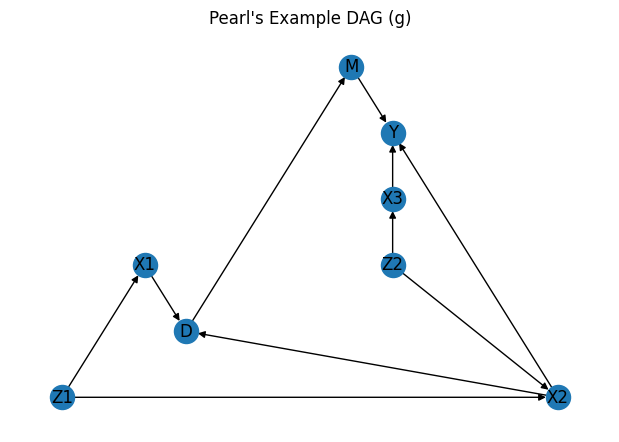


2. Checking d-separation statements:

(A) 'Z2 _||_ Z1' (unconditional)? => True
 => The DAG implies Z2 and Z1 should be unconditionally independent.

(B) 'X2 _||_ X3 | Z2'? => True
 => The DAG implies X2 and X3 are independent once we condition on Z2.

All implied conditional independencies (via pgmpy.get_independencies()):

(X3 ⟂ Z1, X1)
(X3 ⟂ Z1, M, X1, X2, D | Z2)
(X3 ⟂ X1 | Z1)
(X3 ⟂ Z1 | X1)
(X3 ⟂ M | D)
(X3 ⟂ X2, D, M, X1 | Z2, Z1)
(X3 ⟂ X2, Z1, D, X1 | Z2, M)
(X3 ⟂ X2, Z1, D, M | Z2, X1)
(X3 ⟂ Z1, D, M, X1 | Z2, X2)
(X3 ⟂ X2, Z1, M, X1 | Z2, D)
(X3 ⟂ D, M, X1 | X2, Z1)
(X3 ⟂ M | Z1, D)
(X3 ⟂ D, M | X2, X1)
(X3 ⟂ M | D, X1)
(X3 ⟂ M | X2, D)
(X3 ⟂ X2, D, X1 | Z2, Z1, M)
(X3 ⟂ X2, D, M | Z2, Z1, X1)
(X3 ⟂ D, M, X1 | Z2, Z1, X2)
(X3 ⟂ X2, M, X1 | Z2, Z1, D)
(X3 ⟂ X2, Z1, D | Z2, M, X1)
(X3 ⟂ Z1, D, X1 | Z2, X2, M)
(X3 ⟂ X2, Z1, X1 | Z2, D, M)
(X3 ⟂ Z1, D, M | Z2, X2, X1)
(X3 ⟂ X2, Z1, M | Z2, D, X1)
(X3 ⟂ Z1, M, X1 | Z2, D, X2)
(X3 ⟂ D, X1 | X2, Z1, M)
(X3 ⟂ D, M | X2, Z1, X1)
(X3 

In [14]:
import networkx as nx
import pylab as plt
from pgmpy.base.DAG import DAG

##############################################################################
# 1. Construct the DAG in pgmpy
##############################################################################

# The same edges as your R code:
#   Z1 -> X1
#   X1 -> D
#   Z1 -> X2
#   Z2 -> X3
#   X3 -> Y
#   Z2 -> X2
#   X2 -> Y
#   X2 -> D
#   M  -> Y
#   D  -> M

digraph = nx.DiGraph([
    ('Z1','X1'),
    ('X1','D'),
    ('Z1','X2'),
    ('Z2','X3'),
    ('X3','Y'),
    ('Z2','X2'),
    ('X2','Y'),
    ('X2','D'),
    ('M','Y'),
    ('D','M')
])

G = DAG(digraph)

print("\nPearl's Example DAG (g) in pgmpy:\n", G.edges())

# Let's visualize the DAG
plt.figure(figsize=(6, 4))
pos = nx.planar_layout(G)
nx.draw(G, pos, with_labels=True, arrows=True)
plt.title("Pearl's Example DAG (g)")
plt.show()


##############################################################################
# 2. Checking d-separation statements
##############################################################################

# pgmpy provides .is_dconnected(X, Y, observed=[]) for d-connection
# d-separation means "not d-connected".
# So: is_dseparated = not is_dconnected.

def is_dseparated(dag, X, Y, Z=None):
    """Return True if X and Y are d-separated given Z, else False."""
    if Z is None:
        Z = []
    return not dag.is_dconnected(X, Y, observed=Z)

print("\n2. Checking d-separation statements:\n")

# (A) Z2 _||_ Z1 (unconditional)?
resA = is_dseparated(G, "Z2", "Z1", [])
print("(A) 'Z2 _||_ Z1' (unconditional)? =>", resA)
if resA:
    print(" => The DAG implies Z2 and Z1 should be unconditionally independent.")
else:
    print(" => The DAG implies some dependence between Z2 and Z1.")

# (B) X2 _||_ X3 | Z2?
resB = is_dseparated(G, "X2", "X3", ["Z2"])
print("\n(B) 'X2 _||_ X3 | Z2'? =>", resB)
if resB:
    print(" => The DAG implies X2 and X3 are independent once we condition on Z2.")
else:
    print(" => The DAG implies X2 and X3 are dependent even after conditioning on Z2.")


##############################################################################
# 3. Listing implied conditional independencies
##############################################################################

print("\nAll implied conditional independencies (via pgmpy.get_independencies()):\n")

dseps = G.get_independencies()

# `dseps` is a pgmpy IndependenceAssertions object that can store
# lots of statements like X _||_ Y | Z. We'll filter them in a readable way:

for ind in dseps.get_assertions():
    # ind is something like X _|_ Y | [Z1, Z2, ...]
    print(ind)


##############################################################################
# 4. Scenario: check if certain independencies remain if only certain
#    variables are "measured"
##############################################################################

# 4a) Suppose only {D, Y, X2, M} are measured. The R analysis points out
#     that "M _||_ X2 | D" is a testable implication among these 4 variables.
# Let's see if that appears in the independence assertions:

print("\nScenario: Only {D, Y, X2, M} are measured.")
test_ind = is_dseparated(G, "M", "X2", ["D"])
print("Check 'M _||_ X2 | D' =>", test_ind)
if test_ind:
    print(" => This is indeed a testable implication among {D, Y, X2, M}.")
else:
    print(" => The DAG implies they are not independent given D.")

# 4b) Scenario: only {D, Y, X2} are measured => no testable implications among these 3
# We'll just confirm if any single independence among these three alone is implied.

print("\nScenario: Only {D, Y, X2} are measured.")
triplet_independencies = []
for ind in dseps.get_assertions():
    # We'll only consider if X and Y are in {D, Y, X2} and the conditioning set is also a subset
    # of {D, Y, X2}
    Xs = set(ind.event1)
    Ys = set(ind.event2)
    Zs = set(ind.event3)
    all_vars = set(["D", "Y", "X2"])
    # event1, event2 each contain exactly 1 variable if we're checking a direct statement
    if len(Xs) == 1 and len(Ys) == 1 and (Xs|Ys|Zs).issubset(all_vars):
        triplet_independencies.append(ind)

if len(triplet_independencies) == 0:
    print("No implied conditional independencies *only* among {D, Y, X2}.")
else:
    print("Found possible independencies among {D, Y, X2}:")
    for ind in triplet_independencies:
        print("  ", ind)

# 4c) Scenario: all variables except X2 measured => e.g. check if 'Z1 _||_ Z2'
#     is a valid testable implication among the measured set {Z1, Z2, X1, D, X3, Y, M}?

print("\nScenario: All variables except X2 are measured.")
test_ind_Z1Z2 = is_dseparated(G, "Z1", "Z2", [])
print("Check 'Z1 _||_ Z2' unconditional =>", test_ind_Z1Z2)
if test_ind_Z1Z2:
    print(" => This remains a testable implication if X2 is unobserved.")
else:
    print(" => The DAG implies Z1 and Z2 are not independent if X2 is unobserved.")


##############################################################################
# 5. Construct the competing model g_alt (arrow reversed: D -> X2 replaced by
#    X2 -> D).
##############################################################################

digraph_alt = nx.DiGraph([
    ('Z1','X1'),
    ('X1','D'),
    ('Z1','X2'),
    ('Z2','X3'),
    ('X3','Y'),
    ('Z2','X2'),
    ('X2','Y'),
    # Reversed edge is D->X2 (instead of X2->D)
    ('D','X2'),
    ('M','Y'),
    ('D','M')
])
G_alt = DAG(digraph_alt)

print("\nCompeting Model 'g_alt': edges =>", G_alt.edges())

# We'll check the same conditional independence test:
#    "Z1 _||_ D | (X1, X2)" ?

origTest = is_dseparated(G, "Z1", "D", ["X1","X2"])
altTest  = is_dseparated(G_alt, "Z1", "D", ["X1","X2"])

print(f"\nOriginal DAG 'g' => Z1 _||_ D | (X1, X2)? => {origTest}")
print(f"Alternative DAG 'g_alt' => Z1 _||_ D | (X1, X2)? => {altTest}")

if origTest and not altTest:
    print("Conclusion: This conditional independence can distinguish the two models.")
else:
    print("Conclusion: The test does not distinguish the two models in the expected way.")

Regarding the usage of the two libraries, I thought they were quite similar. Both had similar function calls and functionality. I generally prefer python to R, so I would probably use the pgmpy library. The main difference I notice is that pgmpy prints a more exhaustive list of implications, which makes individual implications harder to find. However, I found pgmpy objects easier to work with, as they are more intuitive to me, which more than makes up for the difference in the print statements.

### Assignment 2  
  
For node X_2:  
  
Parent nodes: Z_1, Z_2  
Descendant nodes: Y, D, M  
Non-parent nodes: X_3, X_1, D, M, Y  
Non-descendant nodes: Z_2, Z_1, X_1, X_3  
  
For node M: 
  
Parent nodes: D  
Descendant nodes: Y  
Non-parent nodes: Z_1, Z_2, X_1, X_2, X_3, Y  
Non-descendant nodes: D, Z_1, Z_2, X_1, X_2, X_3  

All backdoor paths between Y and X_2:  
  
1. X_2 <- Z_1 -> X_1 -> D -> M -> Y  
2. X_2 <- Z_2 -> X_3 -> Y  

Yes, we can identify the effect of X_2 on Y by conditioning on Z_1 and Z_2. This is because all backdoor paths between X_2 and Y are blocked by conditioning on Z_1 and Z_2.  

### Assignment 3  
  
For D on M: All indirect paths from D to M go through Y, which is a collider. Thus, the effect of D on M is identifiable by conditioning on an empty set.  
For M on Y: There is are multiple backdoor paths between M and Y that go through D, which is not a collider. However, there are no backdoor paths between M and Y that do not go through D. Thus, the effect of M on Y is identifiable by conditioning on D, since this blocks all backdoor paths between M and Y.  
  

We assume linear conditional expectation functions, such that we have the following:  
  
$E[Y|M, D] = \alpha * M + \beta * D + c$ and $E[M|D] = \gamma * D + \delta$



Claim. Under the following linearity assumptions on the conditional expectation functions (CEFs):
1. $\mathbb{E}[Y \mid M=m,\,D=d] \;=\; \alpha\,m \;+\;\beta\,d \;+\;c,$
2. $\mathbb{E}[M \mid D=d] \;=\; \gamma\,d \;+\;\delta,$


Proof:

We write $Y(d) = Y\bigl(M(d)\bigr)$. In other words, once $D$ is set, the dependence of $Y$ on $D$ can only happen through $M$. 



Express $\mathbb{E}[Y(d)]$ as a Two-Step Expectation:

By the law of iterated expectations:

$$
\mathbb{E}[Y(d)]
\;=\;
\int 
   \Bigl[\mathbb{E}\bigl(Y\bigl(M(d)\bigr)\mid M(d)=m\bigr)\Bigr]\,
   \mathbb{P}\bigl(M(d)=m\bigr)
\,\mathrm{d}m.
$$

Because there is no direct dependence on $d$ once $M(d)$ is fixed, we have

$$
\mathbb{E}\bigl(Y\bigl(M(d)\bigr) \,\big|\,(M(d)=m)\bigr)
\;=\;
\mathbb{E}[\,Y(m)\,]
\;=\;
\mathbb{E}[\,Y\mid M=m\,].
$$

Thus,

$$
\mathbb{E}[Y(d)]
=
\int 
   \mathbb{E}[\,Y\mid M=m\,]\,
   \mathbb{P}\bigl(M(d)=m\bigr)\,
\mathrm{d}m.
$$



Plug in the Linear Form $\mathbb{E}[Y\mid M=m]$

Because in the front-door setting there is no direct path from $D$ to $Y$ that survives once $M$ is set, in the causal sense:

$$
\mathbb{E}[\,Y\mid M=m,\,D=d\,]
\;=\;
\alpha\,m \;+\;\beta\,d \;+\;c
\quad
\text{(fitted model)},
$$

but once $M$ is set, the dependence on $d$ vanishes in the causal interpretation. So:

$$
\mathbb{E}[Y \mid M=m]
\;=\;
\alpha\,m \;+\; c
\quad
(\text{front-door constraint}).
$$

Hence,

$$
\mathbb{E}[Y(d)]
=
\int
   \bigl[\alpha\,m + c \bigr]
   \mathbb{P}\bigl(M(d)=m\bigr)
\,\mathrm{d}m
=
\alpha\;\mathbb{E}\bigl[M(d)\bigr] + c.
$$



Plug in the Linear Form $\mathbb{E}[M\mid D=d]$

By assumption:

$$
\mathbb{E}[M \mid D=d]
\;=\;
\gamma\,d \;+\;\delta.
$$

Hence,

$$
\mathbb{E}[M(d)]
=
\gamma\,d + \delta.
$$

Therefore,

$$
\mathbb{E}[Y(d)]
\;=\;
\alpha\,\bigl(\gamma\,d + \delta\bigr) + c
\;=\;
\alpha\,\gamma\,d + \alpha\,\delta + c.
$$

The average treatment effect (ATE) is:

$$
\mathbb{E}\bigl[Y(1) - Y(0)\bigr]
=
\mathbb{E}[Y(1)] 
-\;
\mathbb{E}[Y(0)].
$$

From the above formula:

- $\mathbb{E}[Y(1)] = \alpha\,\gamma\,\cdot 1 + \alpha\,\delta + c = \alpha\,\gamma + \alpha\,\delta + c.$
- $\mathbb{E}[Y(0)] = \alpha\,\gamma\,\cdot 0 + \alpha\,\delta + c = \alpha\,\delta + c.$

Taking the difference,

$$
\mathbb{E}[Y(1)] - \mathbb{E}[Y(0)]
=
\bigl(\alpha\,\gamma + \alpha\,\delta + c \bigr)
-
\bigl(\alpha\,\delta + c\bigr)
=
\alpha\,\gamma.
$$

Thus,

$$
\mathbb{E}\bigl[Y(1) - Y(0)\bigr]
\;=\;
\alpha\,\gamma,
$$

as claimed.




In [ ]:
# ! pip install dowhy

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import dowhy
import dowhy.api
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

np.random.seed(42)

##################################
# 1. Generate data from the SEM
##################################

# The same SEM as in the notebook:
def gen_data(n):
    Z1 = np.random.normal(0, 1, size=n)
    Z2 = np.random.normal(0, 1, size=n)
    X1 = Z1 + np.random.normal(0, 1, size=n)
    X2 = Z1 + Z2 + np.random.normal(0, 1, size=n)
    X3 = Z2 + np.random.normal(0, 1, size=n)
    D = X1 + X2 + np.random.normal(0, 1, size=n)
    M = D + np.random.normal(0, 1, size=n)
    Y = M + X2 + X3 + np.random.normal(0, 1, size=n)
    return pd.DataFrame({'Z1': Z1, 'Z2': Z2, 'X1': X1, 'X2': X2, 'X3': X3, 'D': D, 'M': M, 'Y': Y})

#############################################
# 2. Define the true causal effect
#############################################

# By construction in this SEM:
#   M = D + noise => E[M | D] = 1 * D + ...
#   Y = M + X2 + X3 + noise => partial slope wrt M is 1
# Hence the front-door effect = alpha * gamma = 1 * 1 = 1.
TRUE_EFFECT = 1.0

#############################################
# 3. Implement two-stage front-door estimator
#############################################

def frontdoor_estimate(data):
    """
    Implements the front-door formula under linearity:
      1) Regress M on D to get gamma_hat
      2) Regress Y on (M, D) to get alpha_hat (the partial slope wrt M)
      3) FD estimate = alpha_hat * gamma_hat
    """
    # 1) M ~ D
    lm_M = LinearRegression().fit(data[['D']], data['M'])
    gamma_hat = lm_M.coef_[0]
    
    # 2) Y ~ M + D
    lm_Y = LinearRegression().fit(data[['M', 'D']], data['Y'])
    alpha_hat = lm_Y.coef_[0]  # The coefficient on M

    return alpha_hat * gamma_hat

#############################################
# 4. Run experiments (100 replications)
#############################################

N_EXPERIMENTS = 100
n = 500

fd_estimates = []

for i in range(N_EXPERIMENTS):
    # Generate fresh data
    df = gen_data(n)
    # Estimate via front-door
    est = frontdoor_estimate(df)
    fd_estimates.append(est)

fd_estimates = np.array(fd_estimates)

# Compute bias, variance, RMSE
bias = np.mean(fd_estimates - TRUE_EFFECT)
variance = np.var(fd_estimates, ddof=1)  # sample variance
rmse = np.sqrt(np.mean((fd_estimates - TRUE_EFFECT)**2))

print("===== Front-Door Estimator (Two-Stage OLS) =====")
print(f"Number of repetitions: {N_EXPERIMENTS}")
print(f"Sample size (n)      : {n}")
print(f"Mean estimate        : {np.mean(fd_estimates):.4f}")
print(f"True effect          : {TRUE_EFFECT}")
print(f"Bias                 : {bias:.4f}")
print(f"Variance             : {variance:.4f}")
print(f"RMSE                 : {rmse:.4f}")

#############################################
# 5. Use DoWhy for a front-door estimate
#############################################
dowhy_values = []
for i in range(100):
    
    data_for_dowhy = gen_data(n)

    # Build the causal graph string for DoWhy
    causal_graph = """digraph {
    Z1; Z2; X1; X2; X3; D; M; Y;
    Z1 -> X1;
    X1 -> D;
    Z1 -> X2;
    Z2 -> X3;
    X3 -> Y;
    Z2 -> X2;
    X2 -> Y;
    X2 -> D;
    M -> Y;
    D -> M;
    }"""

    # Create a CausalModel in DoWhy
    cm = dowhy.CausalModel(
        data=data_for_dowhy,
        treatment='D',
        outcome='Y',
        graph=causal_graph
    )

    # Identify the effect. We explicitly choose the frontdoor approach:
    identified_estimand = cm.identify_effect(proceed_when_unidentifiable=True)

    # Estimate via front-door (two-stage) method
    estimate_dowhy = cm.estimate_effect(
        identified_estimand,
        method_name="frontdoor.two_stage_regression"
    )
    dowhy_values.append(estimate_dowhy.value)

print("\n===== DoWhy Front-Door Estimate =====")
print("Estimated effect:", np.mean(dowhy_values))
print("True effect:", TRUE_EFFECT)
print("Bias:", np.mean(dowhy_values) - TRUE_EFFECT)
print("Variance:", np.var(dowhy_values, ddof=1))
print("RMSE:", np.sqrt(np.mean([(dowhy_val - TRUE_EFFECT)**2 for dowhy_val in dowhy_values])))


===== Front-Door Estimator (Two-Stage OLS) =====
Number of repetitions: 100
Sample size (n)      : 500
Mean estimate        : 1.0010
True effect          : 1.0
Bias                 : 0.0010
Variance             : 0.0111
RMSE                 : 0.1050

===== DoWhy Front-Door Estimate =====
Estimated effect: 0.9893418273418274
True effect: 1.0
Bias: -0.010658172658172593
Variance: 0.009651021116418952
RMSE: 0.09832653532829366
